### Loading Dataset and importing required packages

In [1]:
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
from sklearn.datasets import load_wine # Dataset that I will be using
import matplotlib.pyplot as plt # Plotting 
import pandas as pd # Storing data convenieniently
import numpy as np # Needed for numerical calculations

In [2]:
wines = load_wine()
wine_df = pd.DataFrame(wines.data, columns=wines.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
wine_df.shape

(178, 13)

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### (A). PCA to perform dimension reduction

In [6]:
 # normalizing the data 
from sklearn.preprocessing import StandardScaler
std_wine = StandardScaler().fit_transform(wine_df)

In [7]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(std_wine)

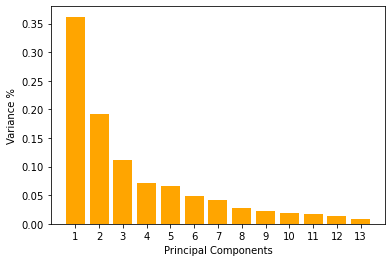

In [8]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='orange')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)
plt.show()


In [9]:
# Putting components in a dataframe 
PCA_components = pd.DataFrame(principalComponents)
PCA_components.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [10]:
PCA_components.shape

(178, 13)

In [11]:
#Variation explained by top 5 Principal Components
np.sum(pca.explained_variance_ratio_[:5])

0.8016229275554789

In [12]:
# Most of the variablity in data is explained by top 5 PC's so we can reduce the dimension to 5 from 13 features originally
Reduced_df= PCA_components.iloc[:, :5]

In [13]:
Reduced_df.shape

(178, 5)

### (B1). Scatter plot of first two Principal Components

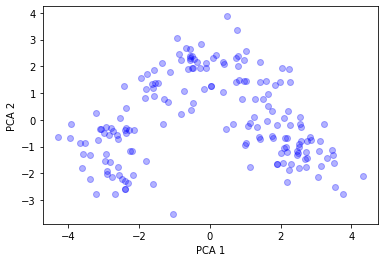

In [14]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### Cluster Analysis

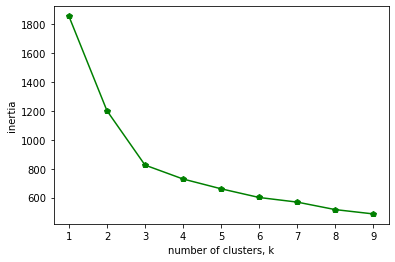

In [15]:
#Deciding Number of clusters using Elbow Chart
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model
    model.fit(Reduced_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='green')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
ks=range(1,10)
plt.xticks(ks)
plt.show()

In [16]:
# Elbow point is at three number of clusters. So we will make 3 clusters

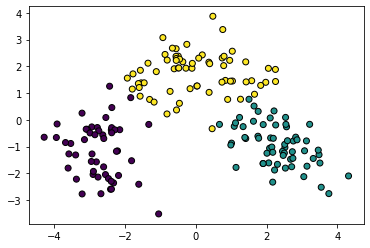

In [17]:
model = KMeans(n_clusters=3)
model.fit(Reduced_df)

labels = model.predict(Reduced_df)
plt.scatter(Reduced_df[0], Reduced_df[1], c=labels, edgecolors ='black')
plt.show()

### (B2). Linear Regression Analyis

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [19]:
#Choosing First PC as Target, rest as features
X = Reduced_df.iloc[:, [1,2,3,4]]
y = Reduced_df.iloc[:, [0]]
print(X.shape, y.shape)

(178, 4) (178, 1)


In [20]:
# Train Test Split - 70% Train / 30% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination for Train Set:', r_sq)

coefficient of determination for Train Set: 0.0015444993861681855


In [23]:
r_sq_test = model.score(X_test, y_test)
print('coefficient of determination for Test Set:', r_sq_test)

coefficient of determination for Test Set: -0.015258088816348492


In [24]:
print('intercept:', model.intercept_)
print('Features regression Coeff:', model.coef_)

intercept: [-0.05406129]
Features regression Coeff: [[0.00745782 0.02604628 0.01608889 0.07914656]]
